# Blip 2

## Introducción

Blip2 es una inteligencia artificial que es capaz de tomar una imagen o video como entrada y tener una conversación y responder preguntas o entregar contexto de lo que muestra esta entrada de manera muy certera 🤯

[GitHub](https://github.com/salesforce/LAVIS/tree/main/projects/blip2)

[Paper](https://arxiv.org/abs/2301.12597)

## Instalación

Para poder instalar esta herramienta lo mejor es crearse un nuevo entorno de anaconda

In [8]:
!$ conda create -n blip2 python=3.9

Ahora nos metemos en el entorno

In [8]:
!$ conda activate blip2

Instalamos todos los módulos necesarios

In [8]:
!$ conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

In [8]:
!$ conda install -c anaconda pillow

In [8]:
!$ conda install -y -c anaconda requests

In [8]:
!$ conda install -y -c anaconda jupyter

Por último instalamos blip2

In [8]:
!$ pip install salesforce-lavis

## Uso

Cargamos las librerías necesarias

In [1]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

Cargamos una imagen de ejemplo

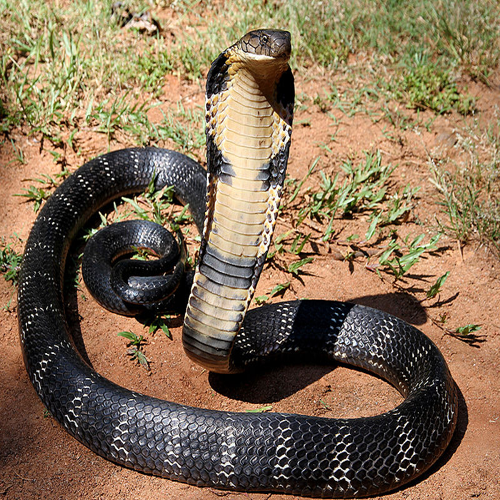

In [2]:
img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/12_-_The_Mystical_King_Cobra_and_Coffee_Forests.jpg/800px-12_-_The_Mystical_King_Cobra_and_Coffee_Forests.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   
display(raw_image.resize((500, 500)))

Establecemos la GPU si las hay

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Asignamos un modelo. En mi caso que tengo un ordenador con 32 GB de RAM y una GPU 3060 con 12 GB de VRAM no puedo usar todos, por lo que he puesto al lado un comentario `ok` con los modelos que he podido usar, y los que no, el error que me ha dado. Si tienes un ordenador con igual RAM y VRAM ya sabes cuáles puedes usar, si no tienes que probar

In [4]:
# name = "blip2_opt"; model_type = "pretrain_opt2.7b"           # ok
# name = "blip2_opt"; model_type = "caption_coco_opt2.7b"       # FAIL VRAM
# name = "blip2_opt"; model_type = "pretrain_opt6.7b"           # FAIL RAM
# name = "blip2_opt"; model_type = "caption_coco_opt6.7b"       # FAIL RAM

# name = "blip2"; model_type = "pretrain"                       # FAIL type error
# name = "blip2"; model_type = "coco"                           # ok

name = "blip2_t5"; model_type = "pretrain_flant5xl"           # ok
# name = "blip2_t5"; model_type = "caption_coco_flant5xl"       # FAIL VRAM
# name = "blip2_t5"; model_type = "pretrain_flant5xxl"          # FAIL

model, vis_processors, _ = load_model_and_preprocess(
    name=name, model_type=model_type, is_eval=True, device=device
)

vis_processors.keys()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

dict_keys(['train', 'eval'])

Preparamos la imagen para metérsela al modelo

In [5]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

### Analizamos la imagen sin preguntar nada

In [6]:
model.generate({"image": image})

['a black and white snake']

### Analizamos la imagen preguntando

In [7]:
prompt = None

In [8]:
def prepare_prompt(prompt, question):
    if prompt is None:
        prompt = question + " Answer:"
    else:
        prompt = prompt + " " + question + " Answer:"
    return prompt

In [9]:
def get_answer(prompt, question, model):
    prompt = prepare_prompt(prompt, question)
    answer = model.generate(
        {
            "image": image,
            "prompt": prompt
        }
    )
    answer = answer[0]
    prompt = prompt + " " + answer + "."
    return prompt, answer

In [10]:
question = "What's in the picture?"
prompt, answer = get_answer(prompt, question, model)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: What's in the picture?
Answer: a snake


In [11]:
question = "What kind of snake?"
prompt, answer = get_answer(prompt, question, model)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: What kind of snake?
Answer: cobra


In [12]:
question = "Is it poisonous?"
prompt, answer = get_answer(prompt, question, model)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: Is it poisonous?
Answer: yes


In [13]:
question = "If it bites me, can I die?"
prompt, answer = get_answer(prompt, question, model)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: If it bites me, can I die?
Answer: yes
